<div id="container" style="position:relative;">
<div style="position:center; float:left"><h1>02 - CryptoPunk Price Prediction<br>Exploratory Data Analysis</h1></div>
<div style="position:relative; float:right"> 

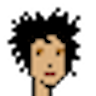
</div>

<hr> 
Madelyn Goodman <br>
Brainstation Winter 2022 Capstone <br>
April 4, 2022
<hr>

# Introduction

In the previous notebook (01-CryptoPunk Price Prediction Data Cleaning and Pre-Processing) I brought in data from a <a href="https://www.kaggle.com/datasets/tunguz/cryptopunks">Kaggle dataset</a> on CryptoPunk transactions from June 2017 until October 2021 as well as data from  <a href="https://www.tradingview.com/symbols/ETHUSD/">TradingView</a> of the daily closing price of ether in USD. I created several features from this data based on my hypotheses of their relationships to the sale price of CryptoPunks. 

A data dictionary of a summary of this work can be found at the end of this notebook for reference. 

In this notebook I performed some exploratory data analysis to get more familiar with the data - understanding its distribution and the features' relationships to eachother and the final sale price of a CryptoPunk. 

I start this analysis by looking at the change in ETH's value over time as well as the prices of CryptoPunks moved from January 2021 to October 2021.
<hr>

In [1]:
#importing necesary packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

!pip install -U kaleido
import kaleido

!pip install pillow


     |████████████████████████████████| 79.9 MB 110 kB/s 


In [3]:
#loading data cleaned in notebook 01

cp_sales = pd.read_csv('Data/punk_sales_data.csv')

# Cleaning Data

In [ ]:
#looking at the first few rows of data
cp_sales.head()

Unnamed: 0 txn_type      date_x     source    eth  punk_id   close  \
0           0     Sold  2017-06-23  larvalabs   0.98        0  326.99   
1           1     Sold  2017-07-07  larvalabs   1.60        0  241.28   
2           2     Sold  2018-11-30  larvalabs  25.00        0  111.65   
3           3     Sold  2017-06-26  larvalabs   0.42        1  252.99   
4           4     Sold  2019-04-06  larvalabs  31.00        1  165.79   

   bid_count  mean_bid  num_prev_sales  ...  wild hair  wild white hair  \
0          0      0.00               0  ...          0                0   
1          9      3.71               1  ...          0                0   
2          1      1.60               2  ...          0                0   
3          4      0.23               0  ...          0                0   
4          4      1.38               1  ...          0                0   

   alien  ape  female  male  zombie  punk_rarity  larvalabs  opensea  
0      0    0       1     0       0     0.461207          1        0  
1      0    0       1     0       0     0.461207          1        0  
2      0    0       1     0       0     0.461207          1        0  
3      0    0       0     1       0     0.337443          1        0  
4      0    0       0     1       0     0.337443          1        0  

[5 rows x 109 columns]

In [4]:
#dropping unamed column
cp_sales.drop('Unnamed: 0', inplace=True, axis=1)
cp_sales.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

In [5]:
#renaming date column
cp_sales.rename(columns={'date_x':'date'}, inplace=True)
cp_sales.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

In [6]:
#sorting by date and punk
cp_sales.sort_values(['date', 'punk_id'], ascending=(True, True), inplace=True, ignore_index=True)
cp_sales.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

In [ ]:
#checking for null values
cp_sales.isna().sum().sum()

0

In [ ]:
cp_sales.duplicated().sum()

0

<hr>

In performing my EDA I wanted to also look at dynamics in the change in price per sale, therefore, I added this feature to the data.
<hr>

In [7]:
#adding column for change in sale price
cp_sales['price_delta'] = cp_sales['eth'] - cp_sales['prev_price']
cp_sales.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

In [ ]:
#looking at all the columns
pd.set_option('display.max_columns', None)
cp_sales.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  days_since_claim  whale_buy  whale_sell  \
0               0         0.0                 0          0           1   
1               0         0.0                 0          0           1   
2               0         0.0                 0          0           1   
3               0         0.0                 0          0           1   
4               0         0.0                 0          0           1   

   3d glasses  bandana  beanie  big beard  big shades  black lipstick  \
0           0        0       0          0           0               0   
1           0        0       0          0           0               0   
2           0        0       0          0           0               1   
3           0        0       0          0           0               0   
4           0        0       0          0           0               0   

   blonde bob  blonde short  blue eye shadow  buck teeth  cap  cap forward  \
0           1             0                0           0    0            0   
1           0             0                0           0    0            0   
2           0             0                0           0    0            0   
3           0             0                0           0    0            0   
4           0             0                0           0    0            0   

   chinstrap  choker  cigarette  classic shades  clown eyes blue  \
0          0       0          0               0                0   
1          0       0          0               0                0   
2          0       0          0               0                0   
3          0       0          0               0                0   
4          0       0          0               0                0   

   clown eyes green  clown hair green  clown nose  cowboy hat  crazy hair  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           1   
2                 0                 0           0           0           0   
3                 0                 0           0           0           1   
4                 0                 0           0           0           0   

   dark hair  do-rag  earring  eye mask  eye patch  fedora  front beard  \
0          0       0        1         0          0       0            0   
1          0       0        0         0          0       0            0   
2          0       0        0         0          0       0            0   
3          0       0        0         0          0       0            0   
4          0       0        0         0          0       0            0   

   front beard dark  frown  frumpy hair  goat  gold chain  green eye shadow  \
0                 0      0            0     0           0                 1   
1                 0      0            0     0           0                 0   
2                 0      0            0     0           0                 1   
3                 0      0            0     0           1                 0   
4                 0      0            0     0           0                 0   

   half shaved  handlebars  headband  hoodie  horned rim glasses  \
0            0           0         0       0                   0   
1            0           0         0       0                   0   
2            0           0         0       0                   0   
3            0           0         0       0                   0   
4            0          

In [ ]:
#checking numerical data datatypes

print('Numeric features: ')
cp_sales[['eth', 'close', 'bid_count', 'mean_bid', 'num_prev_sales', 'prev_price', 'days_since_claim',
         'punk_rarity']].dtypes

Numeric features: 


eth                 float64
close               float64
bid_count             int64
mean_bid            float64
num_prev_sales        int64
prev_price          float64
days_since_claim      int64
punk_rarity         float64
dtype: object

<hr>

I wanted to look at the dynamics in the data over time, therefore it was important for me to check that the `date` column was formatted as datetime.
<hr>

In [ ]:
#checking date datatype
cp_sales['date'].dtypes

dtype('O')

In [8]:
#reformatting date as datetime
cp_sales['date'] = pd.to_datetime(cp_sales['date'])
cp_sales['date'].dtypes

dtype('<M8[ns]')

# Visualizing the data

## ETHXUSD over time

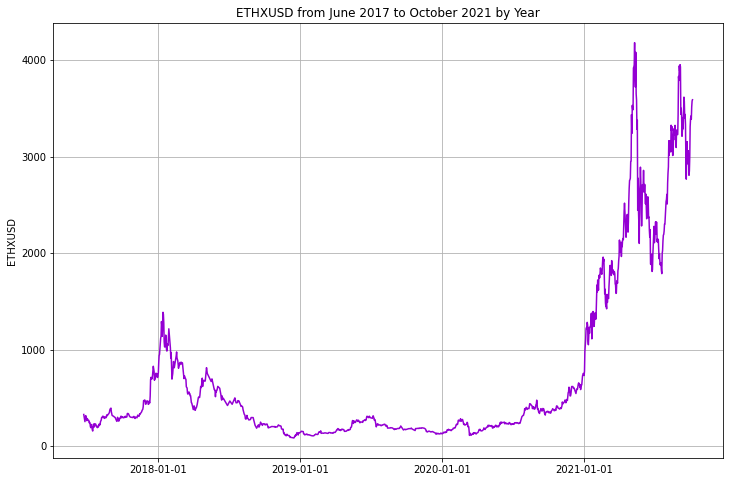

In [ ]:
#ethxusd over time

x = cp_sales['date']
y = cp_sales['close']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, c='darkviolet')
plt.title('ETHXUSD from June 2017 to October 2021 by Year')

plt.ylabel('ETHXUSD')
plt.grid()
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.show()

<hr>

As CryptoPunks, and all NFTs, are bought and sold exclusively in ETH, it is interesting to compare the changing in price and trading volume against the dynamics in the price of ETH. 

Trading volume of NFTs increased by 20,000% between 2020 and 2021, at the same time ETH's value grew exponentially. A rise in popularity of the ecosystem in general could be a reason for these parallel trends and people being willing to spend more with the asset even as its value is growing. 
<hr>

## Punk price over time

<hr>

After looking at the price of ETH over time, I also wanted to look at the movements in prices of punks over time. This was a bit more of a challenge as ecah punk is an individual asset that is priced differently based on its characteristics etc. rather than one asset with consistent value. 

I started with a simple bar chart of sale prices over time. 
<hr>

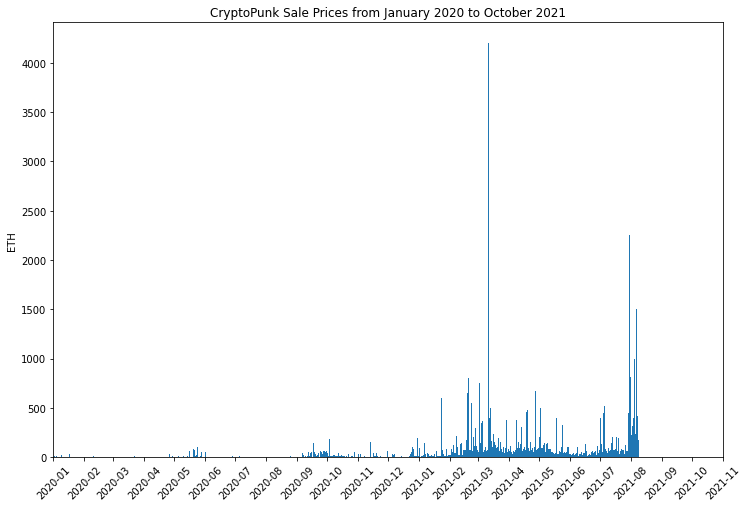

In [ ]:
#Plotting sale price by time

import datetime

#first attempt at graphing sale price over time
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(cp_sales['date'], cp_sales['eth'])

ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2021, 11, 1)])

plt.title('CryptoPunk Sale Prices from January 2020 to October 2021')
plt.ylabel('ETH')
plt.xticks(rotation=45)

plt.show()

<hr>

There are a couple clear outliers here, notably in March 2021. I made a boxplot of sale prices in this month to get an idea of what may be happening.
<hr>

{'boxes': [<matplotlib.lines.Line2D at 0x7fe803bd8b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe803b7ced0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe803ba1e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe803b96750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe803be4690>,
  <matplotlib.lines.Line2D at 0x7fe803b6ff90>]}

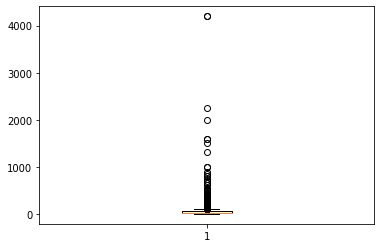

In [ ]:
#boxplot of sales in March
x = cp_sales['eth'][(cp_sales['date']>'2021-01-03') & (cp_sales['date']>'2021-01-04')]

plt.boxplot(x)

<hr>

There are clearly several outliers in this timeframe, but the one at E4,000 is the most notable. It is expected for there to be some outliers as there is a small group of punks with much higher rarity than others and therefore will sell for much higher prices, however, the sale at E4,000 seems to be too far out of even the outlier range and thus needs to be investigated more fully. 
<hr>

In [ ]:
#Looking at the sales that were over E4,000

print('Sales for over E4,000: ')
cp_sales[cp_sales['eth']>4000]

Sales for over E4,000: 


txn_type       date     source     eth  punk_id    close  bid_count  \
10591     Sold 2021-03-11  larvalabs  4200.0     3100  1827.04         11   
10648     Sold 2021-03-11  larvalabs  4200.0     7804  1827.04         18   

       mean_bid  num_prev_sales  prev_price  days_since_claim  whale_buy  \
10591    407.11               1         8.0              1357          0   
10648    475.53               1        12.0              1357          0   

       whale_sell  3d glasses  bandana  beanie  big beard  big shades  \
10591           1           0        0       0          0           0   
10648           0           0        0       0          0           0   

       black lipstick  blonde bob  blonde short  blue eye shadow  buck teeth  \
10591               0           0             0                0           0   
10648               0           0             0                0           0   

       cap  cap forward  chinstrap  choker  cigarette  classic shades  \
10591    0            0          0       0          0               0   
10648    0            1          0       0          0               0   

       clown eyes blue  clown eyes green  clown hair green  clown nose  \
10591                0                 0                 0           0   
10648                0                 0                 0           0   

       cowboy hat  crazy hair  dark hair  do-rag  earring  eye mask  \
10591           0           0          0       0        0         0   
10648           0           0          0       0        0         0   

       eye patch  fedora  front beard  front beard dark  frown  frumpy hair  \
10591          0       0            0                 0      0            0   
10648          0       0            0                 0      0            0   

       goat  gold chain  green eye shadow  half shaved  handlebars  headband  \
10591     0           0                 0            0           0         1   
10648     0           0                 0            0           0         0   

       hoodie  horned rim glasses  hot lipstick  knitted cap  luxurious beard  \
10591       0                   0             0            0                0   
10648       0                   0             0            0                0   

       medical mask  messy hair  mohawk  mohawk dark  mohawk thin  mole  \
10591             0           0       0            0            0     0   
10648             0           0       0            0            0     0   

       mustache  muttonchops  nerd glasses  normal beard  normal beard black  \
10591         0            0             0             0                   0   
10648         0            0             0             0                   0   

       orange side  peak spike  pigtails  pilot helmet  pink with hat  pipe  \
10591            0           0         0             0              0     0   
10648            0           0         0             0              0     1   

       police cap  purple eye shadow  purple hair  purple lipstick  \
10591           0                  0            0                0   
10648           0                  0            0                0   

       red mohawk  regular shades  rosy cheeks  shadow beard  shaved head  \
10591           0               0            0             0            0   
10648           0               0            0             0            0   

       silver chain  small shades  smile  spots  straight hair  \
10591             0             0      0      0              0   
10648             0             1      0      0              0   

       straight hair blonde  straight hair dark  stringy hair  tassle hat  \
10591                     0                   0             0           0   
10648                     0                   0             0           0   

       tiara  top hat  vampire hair  vape  vr  welding goggles  wild blonde  \
10591      0        0             0     0   0 

<hr>

This activity looks extremely suspicious - NFTs can sometimes be used nefariously to move money around and it looks like this might be the case here. For the purposes of this analysis, it is reasonable to say that these sales didn't inform on value and were therefore dropped from the dataset.
<hr>

In [9]:
#restricting the dataset to only those transactions less than 4000 ETH
cp_sales2 = cp_sales[cp_sales.eth < 4000]
cp_sales2.head()

txn_type       date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold 2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold 2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold 2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold 2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold 2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

<hr>

The above bar chart was helpful to identify those outliers, however it was not a great visualization of the dynamics in price. I decided to plot a scatter chart of sales instead to better visualize this. 

Further, it appeared that prices in 2020 were much lower than in 2021, when more trading activity was happening, so I restricted my plot to that timeframe.
<hr>

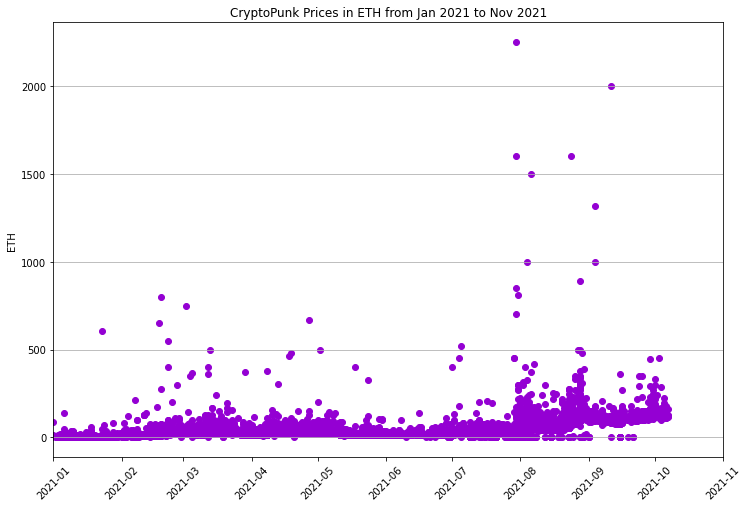

In [ ]:
#scatter plot of CryptoPunk sales from jan 2021 to october 2021

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cp_sales2['date'], cp_sales2['eth'], color='darkviolet')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2021, 11, 1)])
plt.xticks(rotation=45)

plt.title('CryptoPunk Prices in ETH from Jan 2021 to Nov 2021')
plt.ylabel('ETH')
plt.grid(axis='y')

plt.show()

<hr>

This plot shows an interesting lift in price starting around August that maintains through October. There also appears to be somewhat of a subgroup of punks that sell for a higher price, perhaps ones that are more rare, a dynamic that I explored further in other visualizations. 

Seeing this change in trend, I wanted to get an idea of the change in price from one sale to another over time. To get a smoother visual of this, I looekd at average change in price per month from January 2020 to October 2021.
<hr>

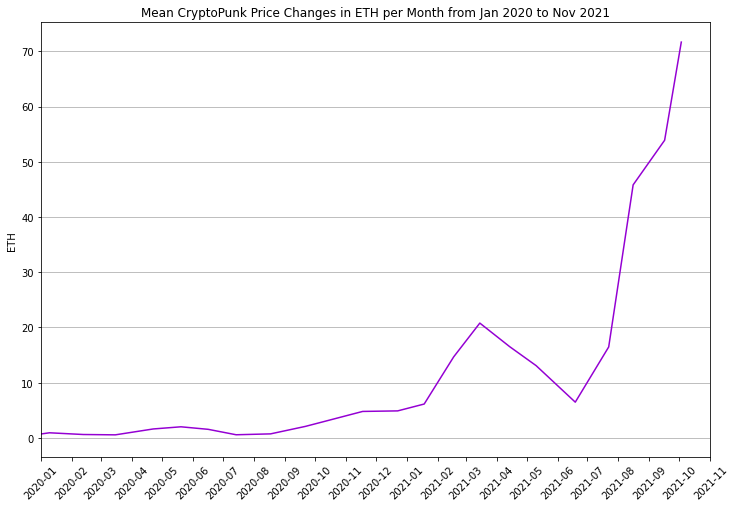

In [ ]:
#change in price over time 2020-2021

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(cp_sales2['date'].groupby(cp_sales2['date'].dt.to_period('m')).mean(), 
        cp_sales2['price_delta'].groupby(cp_sales2['date'].dt.to_period('m')).mean(), 
        color='darkviolet')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2021, 11, 1)])
plt.xticks(rotation=45)

plt.title('Mean CryptoPunk Price Changes in ETH per Month from Jan 2020 to Nov 2021')
plt.ylabel('ETH')
plt.grid(axis='y')

plt.show()



<hr>

This plot confirms my conclusion that prices of punks didn't change very much until 2021. Month-by-month they stayed pretty consistently low and started gradually increasing starting in September 2020 until a sharp rise in January 2021 and a dramatic rise in starting in July 2021. 

When building models with this data, this imbalance in price trends over time could likely bias what models learn about the data. NFTs are a relatively new asset and have never seen a true downward trend and this plot makes that abundantly clear. This means that whatever model I build will liely not be generalizable to a market in which NFTs are not consistently gaining in value. 
<hr>

## Number of bids by days since claimed

<hr>

Given this increase in price and change in price as time moved forward, I wanted to see how bidding activity changed by time, specifically if the longer punks have been on the market the more bids they would get. 

I created a scatter plot of the number of bids per sale by days since the punk was claimed.
<hr>

In [ ]:
#scatter plot of number of bids per sale by days since punk was claimed

fig = go.Figure()

chart_data=go.Scatter(x=cp_sales2['days_since_claim'],
                      y=cp_sales2['bid_count'],
                      mode='markers', marker_color='darkviolet')

fig.add_trace(chart_data)

chart_layout = go.Layout(width=800, height=600, 
                         title='Number of Bids per Sale by Number of Days Since Punk Was Claimed',
                         xaxis_title='Number of days since Punk claimed', 
                         yaxis_title='Bids per sale')

fig.update_layout(chart_layout)

fig.show()

<hr>

In contrast to the trends in prices, it looks like there was a high amount of activity bidding for punks aroudn when they were first released with a lag then a steady growth in bidding traffic the longer the punks were on the market. 

This trend is informative for future NFT launches informing of a trend of high activity around the launch with a lag then the potential for a heavy increase in interest. 
<hr>

## Splits of transactions by whales

<hr>

I made bar graphs of transactions by whale buyers and sellers to get an idea of how many of the total trnasactions were made by these groups. 
<hr>

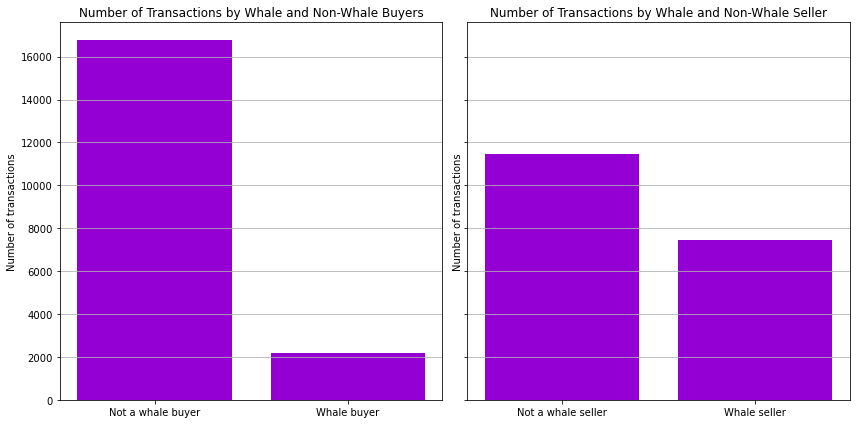

In [ ]:
#side by side bar graphs of buyer and seller whale transactions
labels_sell = {0:'Not a whale seller', 1:'Whale seller'}
whale_sell_values = cp_sales2['whale_sell'].value_counts().rename(index=labels_sell)

labels_buy = {0:'Not a whale buyer', 1:'Whale buyer'}
whale_buy_values = cp_sales2['whale_buy'].value_counts().rename(index=labels_buy)

plt.subplots(1, 2, sharey='row', figsize=(12,6))

plt.subplot(1,2,1)
plt.bar(whale_buy_values.index, whale_buy_values.values, color='darkviolet')
plt.ylabel('Number of transactions')
plt.title('Number of Transactions by Whale and Non-Whale Buyers')
plt.grid(axis='y')

plt.subplot(1,2,2)
plt.bar(whale_sell_values.index, whale_sell_values.values, color='darkviolet')
plt.ylabel('Number of transactions')
plt.title('Number of Transactions by Whale and Non-Whale Seller')
plt.grid(axis='y')

plt.tight_layout()

plt.show()

<hr>

Whale buyers make a minority of the transactions, while whale sellers make quite a bit more in comparison. This imbalance is interesting, as one would think that those who are buying a lot would be the same as those who are selling a lot. It is possible that there is a subset of whale buyers that are wuickly flipping their CryptoPunks and the majority are buying and holding, which would reduce their activity.
<hr>

## Spread of the numeric features

<hr>

I wanted to take a deeper look into the distribution of some of the numeric data, specifically bid count, mean bid, number of rpevious sales, previous price, and punk rarity. I started with looking at the summary tables of the data, then I plotted box plots of each to get a visual of how evenly distributed these variables were.
<hr>

In [ ]:
#Getting a description of the numerical data
numerical = cp_sales2[['bid_count', 'mean_bid', 'num_prev_sales', 'prev_price', 'punk_rarity']]
numerical.describe()

bid_count      mean_bid  num_prev_sales    prev_price   punk_rarity
count  18943.000000  18943.000000    18943.000000  18943.000000  18943.000000
mean       2.062767     13.250291        1.854564     13.273690      0.384387
std        1.978909     25.429839        2.198596     28.071473      0.129842
min        0.000000      0.000000        0.000000      0.000000      0.200698
25%        1.000000      0.140000        0.000000      0.000000      0.311244
50%        2.000000      2.520000        1.000000      1.290000      0.332982
75%        3.000000     18.675000        3.000000     19.000000      0.463243
max       24.000000   1345.000000       20.000000   1320.000000      0.979249

In [ ]:
#box plots of numeric data
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=('Bid count', 'Mean bid', 'Number of previous sales', 'Previous price',
                                   'Punk rarity'))

# Use x instead of y argument for horizontal plot
fig.add_trace(
    go.Box(name='', x=cp_sales2['bid_count']),
    row=1, col=1)

fig.add_trace(
    go.Box(name='', x=cp_sales2['mean_bid']),
    row=1, col=2)

fig.add_trace(
    go.Box(name='', x=cp_sales2['num_prev_sales']),
    row=2, col=1)

fig.add_trace(
    go.Box(name='', x=cp_sales2['prev_price']),
    row=2, col=2)

fig.add_trace(
    go.Box(name='', x=cp_sales2['punk_rarity']),
    row=3, col=1)

fig.update_layout(title_text='CryptoPunk Sale Numeric Feature Distribution',
                  showlegend=False)

fig.show()

<hr>

As I mentioned previously, I expected there to be outliers, especially when it came to prices and bid amounts as seen above with mean bid and previous price. 

It's interesting how the number of bids and the number of previous sales show a similar pattern of evenly distributed outliers as that wasn't expected but is such a clear pattern. 

The distribution of punk rarity was also expected, that the mean would be on the lower end with some extreme outliers due to the nature of rarity meaning that high rarity means there are fewer in that range. 
<hr>

## Traits and types frequency

<hr>

After calculating punk rarity, I wanted to get an idea of what the most common traits were and teh distribution of the punk types. I used the data I saved from the data cleaning process in notebook 01 to create bar charts of these distributions.
<hr>

In [ ]:
#reading in traits data
traits = pd.read_csv('generated_files/traits.csv')

In [ ]:
#reading in types data
types = pd.read_csv('generated_files/type.csv')

### Traits frequencies

In [ ]:
#looking at traits data
traits.head()

Unnamed: 0  0  3  6  9  10  13  16  18  20  23  29  33  35  38  40  43  46  \
0  3d glasses  0  0  0  0   0   0   0   0   0   0   0   1   0   0   0   0   0   
1     bandana  0  0  0  0   0   0   0   1   0   0   0   0   0   0   0   0   0   
2      beanie  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   
3   big beard  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4  big shades  0  0  0  0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   50  51  55  57  58  59  63  64  65  67  71  77  78  79  81  87  90  95  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   100  101  102  106  108  109  111  113  115  119  121  125  126  127  128  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    1    0    0    0    0    0    0    0    1    0    0    0    0   

   130  132  134  137  140  142  144  145  150  153  155  158  159  160  161  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    1    0    1    1    0    0    0    0    0    0    1    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   163  169  171  174  180  183  186  188  189  191  192  197  198  203  205  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   206  207  208  210  212  216  218  219  220  224  233  235  237  241  249  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    1    0    0   

   250  251  252  253  255  256  258  259  267  268  272  274  276  277  282  \
0    1    0    1    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
4    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   

   286  288  290  291  293  298  299  303  305  309  310  311  314  315  316  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   318  319  320  321  323  325  326  332  333  335  338  339  341  343  345  \
0    0    0    0    0    0    0    0    1    0    0    1    1    0    0    0   
1    0 

In [ ]:
#renaming the traits column
traits.rename(columns={'Unnamed: 0':'trait'}, inplace=True)

In [ ]:
#making sure it was renamed
traits.head()

trait  0  3  6  9  10  13  16  18  20  23  29  33  35  38  40  43  46  \
0  3d glasses  0  0  0  0   0   0   0   0   0   0   0   1   0   0   0   0   0   
1     bandana  0  0  0  0   0   0   0   1   0   0   0   0   0   0   0   0   0   
2      beanie  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   
3   big beard  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4  big shades  0  0  0  0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   50  51  55  57  58  59  63  64  65  67  71  77  78  79  81  87  90  95  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   100  101  102  106  108  109  111  113  115  119  121  125  126  127  128  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    1    0    0    0    0    0    0    0    1    0    0    0    0   

   130  132  134  137  140  142  144  145  150  153  155  158  159  160  161  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    1    0    1    1    0    0    0    0    0    0    1    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   163  169  171  174  180  183  186  188  189  191  192  197  198  203  205  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   206  207  208  210  212  216  218  219  220  224  233  235  237  241  249  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    1    0    0   

   250  251  252  253  255  256  258  259  267  268  272  274  276  277  282  \
0    1    0    1    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
4    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   

   286  288  290  291  293  298  299  303  305  309  310  311  314  315  316  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   318  319  320  321  323  325  326  332  333  335  338  339  341  343  345  \
0    0    0    0    0    0    0    0    1    0    0    1    1    0    0    0   
1    0    0 

In [ ]:
#dropping all the columns except for traits and number of punks
traits = traits[['trait', 'num_punks']]

In [ ]:
#looking at the new dataframe
traits.head()

trait  num_punks
0  3d glasses        167
1     bandana        339
2      beanie         34
3   big beard         91
4  big shades        332

In [ ]:
#sorting traits in order of number of punks with them
traits.sort_values('num_punks', ascending=False, inplace=True)
traits.head()

trait  num_punks
24         earring       1685
14       cigarette        611
48            mole        466
40    hot lipstick        413
5   black lipstick        390

In [ ]:
#plotting the top 10 most common traits
trait_frequency = px.bar(traits.head(10),
                        'trait',
                        'num_punks',
                        height=500,
                        title='Top 10 Most Common Punk Attributes')

trait_frequency.show()

<hr>

Earrings was the most common trait followed by cigarettes. The rest fo the top 10 were found in roughly the same number of punks.
<hr>

### Types frequencies

In [ ]:
#looking at the types data
types.head()

Unnamed: 0  0  3  6  9  10  13  16  18  20  23  29  33  35  38  40  43  46  \
0      alien  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1        ape  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     female  1  0  1  0   1   1   1   1   0   0   0   0   0   1   0   1   1   
3       male  0  1  0  1   0   0   0   0   1   1   1   1   1   0   1   0   0   
4     zombie  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   50  51  55  57  58  59  63  64  65  67  71  77  78  79  81  87  90  95  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   1   1   1   0   1   0   0   0   0   0   1   1   1   0   0   0   0   0   
3   0   0   0   1   0   1   1   1   1   1   0   0   0   1   1   1   1   1   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   100  101  102  106  108  109  111  113  115  119  121  125  126  127  128  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    1    0    0    0    0    0    0   
3    1    0    1    1    1    0    0    1    0    1    1    1    1    1    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   130  132  134  137  140  142  144  145  150  153  155  158  159  160  161  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    1    0    1    0    0    0    1    0    1    1    0    0    0    1   
3    0    0    1    0    1    1    1    0    1    0    0    1    1    1    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   163  169  171  174  180  183  186  188  189  191  192  197  198  203  205  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    1    0    1    1    1    1    1    1    1    0    1    0    1    0   
3    0    0    1    0    0    0    0    0    0    0    1    0    1    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   206  207  208  210  212  216  218  219  220  224  233  235  237  241  249  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    1    1    0    0    0    1    1    0    1    0   
3    0    1    0    1    1    0    0    1    1    1    0    0    1    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   250  251  252  253  255  256  258  259  267  268  272  274  276  277  282  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    0    1    1    0    0    0    1    1    0    1    0    0   
3    1    0    1    1    0    0    1    1    1    0    0    1    0    1    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   286  288  290  291  293  298  299  303  305  309  310  311  314  315  316  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    1    1    0    0    0    0    1    0    0    1   
3    0    1    0    1    1    0    0    1    1    1    1    0    1    1    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   318  319  320  321  323  325  326  332  333  335  338  339  341  343  345  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0 

In [ ]:
#renaming the type column
types.rename(columns={'Unnamed: 0':'type'}, inplace=True)

In [ ]:
#dropping all the columns other than types and number of punks
types = types[['type', 'num_punks']]
types

type  num_punks
0   alien          7
1     ape         17
2  female       2242
3    male       4080
4  zombie         47

In [ ]:
#sorting by number of punks
types.sort_values('num_punks', ascending=False, inplace=True)

In [ ]:
#plotting bar chart of punk frequency
type_frequency = px.bar(types,
                        'type',
                        'num_punks',
                        height=500,
                        title='Number of Punks per type')

type_frequency.show()

<hr>

The vast majority of punks are male with very very few aliens, apes, and zombies. Punks of these types would be very rare and were expected to be priced the highest. The fact that these types were so rare would account for the few punks being sold at much greater prices than the rest. 
<hr>

## Price by rarity

<hr>

Looking at the frequencies of traits and types of punks, it was clear the dramatic differences in frequencies of characteristics that would impact the rarity of the punk, and perhaps its price. To look further into this I created a scatter plot of the mean price of each punk by it's rarity. 
<hr>

In [ ]:
#plot of mean price of each punk by its rarity score

fig = go.Figure()

chart_data=go.Scatter(x=cp_sales2['punk_rarity'].groupby(cp_sales2['punk_id']).mean(),
                      y=cp_sales2['eth'].groupby(cp_sales2['punk_id']).mean(),
                      mode='markers', marker_color='darkviolet'
                      )

fig.add_trace(chart_data)

chart_layout = go.Layout(width=800, height=600, title='Mean Price of Each Punk by Its Rarity Score',
                         xaxis_title='Punk Rarity Score', yaxis_title='Mean price (ETH)' 
                        )

fig.update_layout(chart_layout)
fig.add_vline(0.5)
fig.add_hline(600)
fig.show()

<hr>

Five distinct rarity groups came out of this plot. 

This graph does not show that there are dramatically different trends in pricing by rarity, with only those with the highest rarity scores having much higher average prices. It is noteabble that only five punks fall into the quadrant of having a high rarity score and high mean price. In fact, these 5 are the only ones in the top half of prices. The mean prices could be biased by the long period of prices remaining stable only with greater changes happening in 2021. 

I wanted to explore the different groupings of rarity more and how these might have been impacted by change in price over time differently. 
<hr>

### Making the 5 different distinctions of rarity

In [ ]:
#Making a new dataframe to work with rarity and price
punk_rarity_df = cp_sales2[['punk_id', 'punk_rarity', 'eth', 'date', 'num_prev_sales', 'prev_price']]

In [ ]:
#looking at the first few rows of the new dataframe
punk_rarity_df.head()

punk_id  punk_rarity   eth       date  num_prev_sales  prev_price
0        0     0.461207  0.98 2017-06-23               0         0.0
1      544     0.347835  0.00 2017-06-23               0         0.0
2     1841     0.566622  0.25 2017-06-23               0         0.0
3     3134     0.324392  0.00 2017-06-23               0         0.0
4     4025     0.321051  0.06 2017-06-23               0         0.0

In [ ]:
#creating the different classification groups using arbitrary cut offs informed by trends in the above chart

punk_rarity_df['punk_groups'] = 0

#Very rare
punk_rarity_df['punk_groups'] = np.where(punk_rarity_df['punk_rarity'] >= 0.8, 'Very rare', 
                                         punk_rarity_df['punk_groups'] 
                                         )

#Rare
punk_rarity_df['punk_groups'] = np.where((punk_rarity_df['punk_rarity'] < 0.8) & \
                                              (punk_rarity_df['punk_rarity'] >= 0.5) , 
                                         'Rare', punk_rarity_df['punk_groups'])

#Somewhat rare
punk_rarity_df['punk_groups'] = np.where((punk_rarity_df['punk_rarity'] < 0.5) & \
                                                       (punk_rarity_df['punk_rarity'] >= 0.37) , 
                                           'Somewhat rare', punk_rarity_df['punk_groups'])

#Less rare
punk_rarity_df['punk_groups'] = np.where((punk_rarity_df['punk_rarity'] < 0.37) & \
                                                       (punk_rarity_df['punk_rarity'] >= 0.26) , 
                                      'Less rare', punk_rarity_df['punk_groups'])

#Not rare
punk_rarity_df['punk_groups'] = np.where(punk_rarity_df['punk_rarity']<0.26, 'Not rare', punk_rarity_df['punk_groups'] 
                                         )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#making sure that this new column and new distinctions were actually made
punk_rarity_df.head()

punk_id  punk_rarity   eth       date  num_prev_sales  prev_price  \
0        0     0.461207  0.98 2017-06-23               0         0.0   
1      544     0.347835  0.00 2017-06-23               0         0.0   
2     1841     0.566622  0.25 2017-06-23               0         0.0   
3     3134     0.324392  0.00 2017-06-23               0         0.0   
4     4025     0.321051  0.06 2017-06-23               0         0.0   

     punk_groups  
0  Somewhat rare  
1      Less rare  
2           Rare  
3      Less rare  
4      Less rare

### Price and change in price over time by rarity status

<hr>

Using these groupings of rarity, I wanted to plot the sales price as well as change in price of sales over time again, this time differentiating each punk by its rarity level. 
<hr>

In [ ]:
#restricting the rarity dataframe to only include dales in 2021
punk_rarity_df2=punk_rarity_df[punk_rarity_df['date']>='01-01-2021']

In [ ]:
#calculating change in price for the rarity dataframe
punk_rarity_df2['price_change'] = punk_rarity_df2['eth']-punk_rarity_df2['prev_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#plotting sale price over time grouping by rarity 
date_price = px.scatter(data_frame=punk_rarity_df2,
                        x=punk_rarity_df2['date'],
                        y=punk_rarity_df2['eth'],
                        color=punk_rarity_df2['punk_groups'],
                        height=500,
                        title='CryptoPunk Sale Price in 2021 by Rarity Status')
date_price.update_xaxes()
date_price.show()

<hr>

Unsurprisingly, the very rare punks are those that sell at the higest prices. What's interesting, is that very few were sold between April and July of 2021. Only those punks that were more common in the "somewhat", "less", and "not" groups were sold during this period. 

What's also interesting is that "less rare" punks seem to have had a break out in price starting around late August to September, many selling for more than some of the "rare" punks. Further, some "not rare" punks were also selling for more than "somewhat rare" punks.
<hr>

In [ ]:
#plotting change in price over time by rarity
date_price = px.scatter(data_frame=punk_rarity_df2,
                        x=punk_rarity_df2['date'],
                        y=punk_rarity_df2['price_change'],
                        color=punk_rarity_df2['punk_groups'],
#                         color_continuous_scale=px.colors.sequential.Jet,
                        height=500,
                        title='Change in CryptoPunk Sale Price in 2021 by Rarity Status')
date_price.update_xaxes()

date_price.show()

<hr>

As could have been expected, very rare punks had the greatest increase in price, which was seen in the previous plot as a few shot up in price later in 2021. 

What's most noteable in this plot is the loss in value that happened for some punk in the later part of 2021. This could be due to the fact that there was more trading volume and this was the correction for some punks being valued too highly prior since there was more comptetition in that moment. 
<hr>

# Regression

<hr>

I decided to do some quick regression analyses as part of my EDA to look into questions like, which attributes contribute most to price and in what direction? As well as what the effects were of the numeric traits. 

I evaluated attributes and numeric traits separately in order to get an idea of how these two groups impact price differently. These regression models did not score very well, however, here model performance was not my main concern, I simply wanted to get an idea of the general effect of the variables on price. 
<hr>

## Regression of attributes on price

### Ordinary least squares regression 

<hr>

I started this analysis by first performing an ordinary least squares regression in order to evaluate which attributes impacted price in a statistically significant manner. 
<hr>

In [ ]:
#looking at the dataset to build the model
cp_sales2.head()

txn_type       date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold 2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold 2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold 2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold 2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold 2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  days_since_claim  whale_buy  whale_sell  \
0               0         0.0                 0          0           1   
1               0         0.0                 0          0           1   
2               0         0.0                 0          0           1   
3               0         0.0                 0          0           1   
4               0         0.0                 0          0           1   

   3d glasses  bandana  beanie  big beard  big shades  black lipstick  \
0           0        0       0          0           0               0   
1           0        0       0          0           0               0   
2           0        0       0          0           0               1   
3           0        0       0          0           0               0   
4           0        0       0          0           0               0   

   blonde bob  blonde short  blue eye shadow  buck teeth  cap  cap forward  \
0           1             0                0           0    0            0   
1           0             0                0           0    0            0   
2           0             0                0           0    0            0   
3           0             0                0           0    0            0   
4           0             0                0           0    0            0   

   chinstrap  choker  cigarette  classic shades  clown eyes blue  \
0          0       0          0               0                0   
1          0       0          0               0                0   
2          0       0          0               0                0   
3          0       0          0               0                0   
4          0       0          0               0                0   

   clown eyes green  clown hair green  clown nose  cowboy hat  crazy hair  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           1   
2                 0                 0           0           0           0   
3                 0                 0           0           0           1   
4                 0                 0           0           0           0   

   dark hair  do-rag  earring  eye mask  eye patch  fedora  front beard  \
0          0       0        1         0          0       0            0   
1          0       0        0         0          0       0            0   
2          0       0        0         0          0       0            0   
3          0       0        0         0          0       0            0   
4          0       0        0         0          0       0            0   

   front beard dark  frown  frumpy hair  goat  gold chain  green eye shadow  \
0                 0      0            0     0           0                 1   
1                 0      0            0     0           0                 0   
2                 0      0            0     0           0                 1   
3                 0      0            0     0           1                 0   
4                 0      0            0     0           0                 0   

   half shaved  handlebars  headband  hoodie  horned rim glasses  \
0            0           0         0       0                   0   
1            0           0         0       0                   0   
2            0           0         0       0                   0   
3            0           0         0       0                   0   
4            0           0    

In [ ]:
#defining variables to drop for modeling
todrop = ['txn_type', 'date', 'source','punk_id','close','bid_count','mean_bid','num_prev_sales',
          'prev_price','days_since_claim','whale_buy','whale_sell', 'punk_rarity','larvalabs','opensea']

#dropping variables for modeling
traits_type_df = cp_sales2.drop(todrop, axis=1)
traits_type_df.head()

eth  3d glasses  bandana  beanie  big beard  big shades  black lipstick  \
0  0.98           0        0       0          0           0               0   
1  0.00           0        0       0          0           0               0   
2  0.25           0        0       0          0           0               1   
3  0.00           0        0       0          0           0               0   
4  0.06           0        0       0          0           0               0   

   blonde bob  blonde short  blue eye shadow  buck teeth  cap  cap forward  \
0           1             0                0           0    0            0   
1           0             0                0           0    0            0   
2           0             0                0           0    0            0   
3           0             0                0           0    0            0   
4           0             0                0           0    0            0   

   chinstrap  choker  cigarette  classic shades  clown eyes blue  \
0          0       0          0               0                0   
1          0       0          0               0                0   
2          0       0          0               0                0   
3          0       0          0               0                0   
4          0       0          0               0                0   

   clown eyes green  clown hair green  clown nose  cowboy hat  crazy hair  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           1   
2                 0                 0           0           0           0   
3                 0                 0           0           0           1   
4                 0                 0           0           0           0   

   dark hair  do-rag  earring  eye mask  eye patch  fedora  front beard  \
0          0       0        1         0          0       0            0   
1          0       0        0         0          0       0            0   
2          0       0        0         0          0       0            0   
3          0       0        0         0          0       0            0   
4          0       0        0         0          0       0            0   

   front beard dark  frown  frumpy hair  goat  gold chain  green eye shadow  \
0                 0      0            0     0           0                 1   
1                 0      0            0     0           0                 0   
2                 0      0            0     0           0                 1   
3                 0      0            0     0           1                 0   
4                 0      0            0     0           0                 0   

   half shaved  handlebars  headband  hoodie  horned rim glasses  \
0            0           0         0       0                   0   
1            0           0         0       0                   0   
2            0           0         0       0                   0   
3            0           0         0       0                   0   
4            0           0         0       0                   0   

   hot lipstick  knitted cap  luxurious beard  medical mask  messy hair  \
0             0            0                0             0           0   
1             0            0                0             0           0   
2             0            0                0             0           0   
3             0            0                0             0           0   
4             0            1                0             0           0   

   mohawk  mohawk dark  mohawk thin  mole  mustache  muttonchops  \
0       0            0            0     0         0            0   
1       0            0            0     0         0            0   
2       0            0            1     0         0            0   
3       0            0            0     0         0            0   
4       0            0            0     0         0           

In [ ]:
#defining variables to regress
y=traits_type_df['eth']
x=traits_type_df.drop(['eth', 'price_delta'], axis=1)

In [ ]:
#importing necessary packages
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

#setting constant 
x_const=sm.add_constant(x)

#instantiating the regression 
reg = sm.OLS(y, x_const)

#fitting the regression
reg_results = reg.fit()

reg_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    eth   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     26.27
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:44:15   Log-Likelihood:            -1.0161e+05
No. Observations:               18943   AIC:                         2.034e+05
Df Residuals:                   18851   BIC:                         2.041e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.268e+13      9e+13     -0.918      0.359   -2.59e+14    9.38e+13
3d glasses              29.5219      2.799     10.546      0.000      24.035      35.009
bandana                 -8.7249      3.082     -2.831      0.005     -14.766      -2.683
beanie                  33.6158      5.875      5.722      0.000      22.100      45.132
big beard                6.2446      3.454      1.808      0.071      -0.525      13.014
big shades               2.6515      1.821      1.456      0.145      -0.917       6.220
black lipstick          -2.0076      1.868     -1.075      0.283      -5.670       1.655
blonde bob              -1.0885      5.025     -0.217      0.828     -10.937       8.760
blonde short             3.2049      4.911      0.653      0.514      -6.420      12.830
blue eye shadow         -4.1098      2.668     -1.540      0.123      -9.340       1.120
buck teeth              10.6898      5.556      1.924      0.054      -0.201      21.580
cap                     -1.3459      3.362     -0.400      0.689      -7.935       5.243
cap forward             -3.3573      3.487     -0.963      0.336     -10.193       3.478
chinstrap                4.8198      2.149      2.243      0.025       0.608       9.032
choker                   4.5904      6.780      0.677      0.498      -8.700      17.880
cigarette               -0.1116      1.337     -0.083      0.933      -2.731       2.508
classic shades          -0.9336      1.710     -0.546      0.585      -4.285       2.418
clown eyes blue         -1.8622      2.070     -0.900      0.368      -5.919       2.195
clown eyes green        -1.9586      2.089     -0.937      0.349      -6.054       2.137
clown hair green         1.1318      4.121      0.275      0.784      -6.945       9.209
clown nose              -0.4061      2.747     -0.148      0.882      -5.790       4.978
cowboy hat               0.5818      4.387      0.133      0.894      -8.017       9.181
crazy hair               5.7225      3.371      1.698      0.090      -0.885      12.330
dark hair               -4.4701      4.138     -1.080      0.280     -12.580       3.640
do-rag                  -9.5069      3.277     -2.902      0.004     -15.929      -3.085
earring                 -0.1671      0.882     -0.189      0.850      -1.897       1.562
eye mask                 1.5379      2.277      0.675      0.500      -2.926       6.002
eye patch               -2.2558      1.830     -1.233      0.218      -5.843       1.331
fedora                  -3.2302      3.699     -0.873      0.383     -10.481       4.020
front beard              2.1273      2.181      0.975      0.329      -2.149       6.403
front beard dark         0.2927      2.140      0.137      0.891      -3.901       4.487
frown                   -2.2276      2.169     -1.027    

<hr>

This model did not fit well with and R2 of 0.1, however, it gives me an idea of which attributes might be significantly related to price. Further, this analysis also provides a justification for fitting the non-linear models I did in the next notebook (03-Punk Price Prediction Model Construction).

Some attributes did show statistical significance:  
- 3d glasses
- bandana
- beanie
- chinstrap
- do-rag
- frumpy hair
- gold chain
- headband
- hoodie
- luxurious beard
- mohawk
- mohawk dark
- mohawk thin
- orange slide
- peak spike
- pigtails
- pilot helmet
- pink with hat
- pipe
- shaved head
- smile
- stringy hair
- tiara
- top hat
- vr
- welding goggles
- ape
- female
- male
- zombie

<hr>

### Ridge regression

<hr>

I next performed a ridge regression on the attributes data against price to get a better idea of the effect size of the attributes on price. I used this model hoping that it would fit the data better using a regularization technique. 
<hr>

In [ ]:
#making sure the number of observations match for x and y
print(x.shape)
print(y.shape)

(18943, 92)
(18943,)


In [ ]:
#importing necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
#setting up a grid search to fit a model with the best parameters
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(Ridge(), param_grid=params)

sk_reg = grid_search.fit(x, y)

In [ ]:
#printing the results of the grid search 
sk_reg.best_estimator_

Ridge(alpha=1000, solver='lsqr')

In [ ]:
#scoring the model on the training data
sk_reg.score(x, y)

0.03827984737437329

<hr>

I didn't do a train-test split as the intention for running this model was not for it to be used on unseen data in the future, but rather to generate insights on the data that I have now. 

Unfortunately this model did not perform well on this data either, however, I still wanted to get an idea of what the effect sizes might be like so I continued with my plan to plot these coefficients. 
<hr>

In [ ]:
#fitting the best regression from the grid search
best = Ridge(alpha=100, solver='lsqr', random_state=456)

best.fit(x, y)

Ridge(alpha=100, random_state=456, solver='lsqr')

In [ ]:
#printing the coefficients from the ridge model
best.coef_

array([ 2.25060821e+01, -7.55060110e+00,  1.71346730e+01,  3.66207765e+00,
        1.67029360e+00, -3.67016787e+00, -1.58813766e+00,  1.09995886e+00,
       -5.19624553e+00,  4.66494759e+00, -1.37275517e+00, -2.33964580e+00,
        2.85522902e+00,  1.45269092e+00, -7.65111048e-01, -2.16609288e+00,
       -3.08631426e+00, -3.30044354e+00, -8.84994416e-02, -7.32511621e-01,
        3.89256698e-01,  5.21179275e+00, -4.38492109e+00, -7.71261215e+00,
       -3.95313479e-01, -2.65406847e-01, -2.74032787e+00, -2.00222250e+00,
        4.58181640e-01, -9.10125615e-01, -2.39810768e+00, -7.59670127e+00,
       -1.61156905e+00,  9.48293177e+00,  4.51737563e-01, -2.67058806e+00,
       -2.63510137e+00, -7.13205677e+00,  2.78400201e+01, -3.06645760e+00,
       -2.76439418e+00, -3.42695263e+00,  6.32368893e+00,  4.26435599e-02,
       -5.77042881e+00, -7.76154176e+00, -6.33166739e+00, -6.40732049e+00,
       -3.47415675e+00, -1.77790574e+00, -3.26653290e+00, -5.12947461e-01,
        2.11894367e-01,  

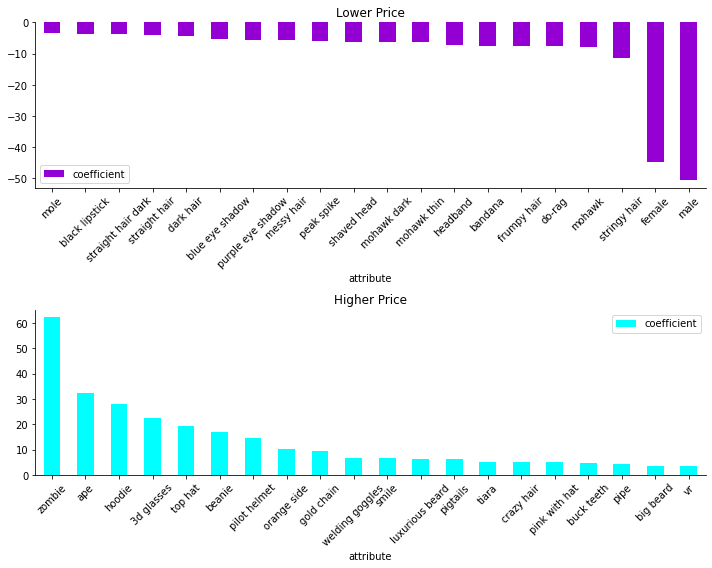

In [ ]:
#plotting the 20 highest and 20 lowest effect sizes
def plot_coefs(best, attributes):

  '''
  Plotting the 20 highest and 20 lowest coefficients of a ridge regression

  Parameters
  ----------------------------------------
  best: A fitted linear regression model
  attributes: column names from the features passed into the model

  Return
  ----------------------------------------
  This function returns two bar charts showing the 20 largest and 20 loest effect sizes of 
  a linear regression model.
  '''

  coef_df = pd.DataFrame({"coefficient": best.coef_, "attribute": attributes})
  coef_df = coef_df.sort_values("coefficient", ascending=False)

  fig, axs = plt.subplots(2, 1, figsize=(10, 8))

  # smallest coefficient -> tokens indicating negative sentiment 
  coef_df.tail(20).set_index("attribute").plot(kind="bar", rot=45, ax=axs[0], color="darkviolet")
  axs[0].set_title("Lower Price")
 
    
  # largest coefficient -> tokens indicating positive sentiment 
  coef_df.head(20).set_index("attribute").plot(kind="bar", rot=45, ax=axs[1], color="aqua")
  axs[1].set_title("Higher Price")
    
  sns.despine()
  plt.tight_layout()
  plt.show()

  

plot_coefs(best, x.columns)

<hr>

Zombies are associated with the highest price followed by the punk having a hoodie and being an ape. These make sense as having the greatest effect on having a higher price as these types and attributes are associated with greater rarity. 

Being male and female by far have the largest effect of a punk having a lower price. As these are the most common types of punks, it makes sense that being of these types would lower the price of the punk. 
<hr>

### Price against numeric traits

<hr>

Using similar methods as with the data on attributes and punk type, I wanted to get an idea of the effect of the numeric variables on price. 
<hr>

In [ ]:
#looking at the data
cp_sales2.head()

txn_type        date     source   eth  punk_id   close  bid_count  mean_bid  \
0     Sold  2017-06-23  larvalabs  0.98        0  326.99          0       0.0   
1     Sold  2017-06-23  larvalabs  0.00      544  326.99          0       0.0   
2     Sold  2017-06-23  larvalabs  0.25     1841  326.99          0       0.0   
3     Sold  2017-06-23  larvalabs  0.00     3134  326.99          0       0.0   
4     Sold  2017-06-23  larvalabs  0.06     4025  326.99          0       0.0   

   num_prev_sales  prev_price  ...  wild white hair  alien  ape  female  male  \
0               0         0.0  ...                0      0    0       1     0   
1               0         0.0  ...                0      0    0       0     1   
2               0         0.0  ...                0      0    0       1     0   
3               0         0.0  ...                0      0    0       0     1   
4               0         0.0  ...                0      0    0       0     1   

   zombie  punk_rarity  larvalabs  opensea  price_delta  
0       0     0.461207          1        0         0.98  
1       0     0.347835          1        0         0.00  
2       0     0.566622          1        0         0.25  
3       0     0.324392          1        0         0.00  
4       0     0.321051          1        0         0.06  

[5 rows x 109 columns]

In [14]:
#defining variables to keep in the dataset to regress on 
tokeep = ['close','bid_count','mean_bid','num_prev_sales',
          'prev_price','days_since_claim','whale_buy','whale_sell', 'punk_rarity', 
          'eth']

In [15]:
#creating a data frame of just price and numeric variables
cp_sales_num = cp_sales2[tokeep]

<hr>

Before performing a regression on this data I wanted to get an idea of the correlations between the variables. I plotted a correlation matrix to visualize these dynamics.
<hr>

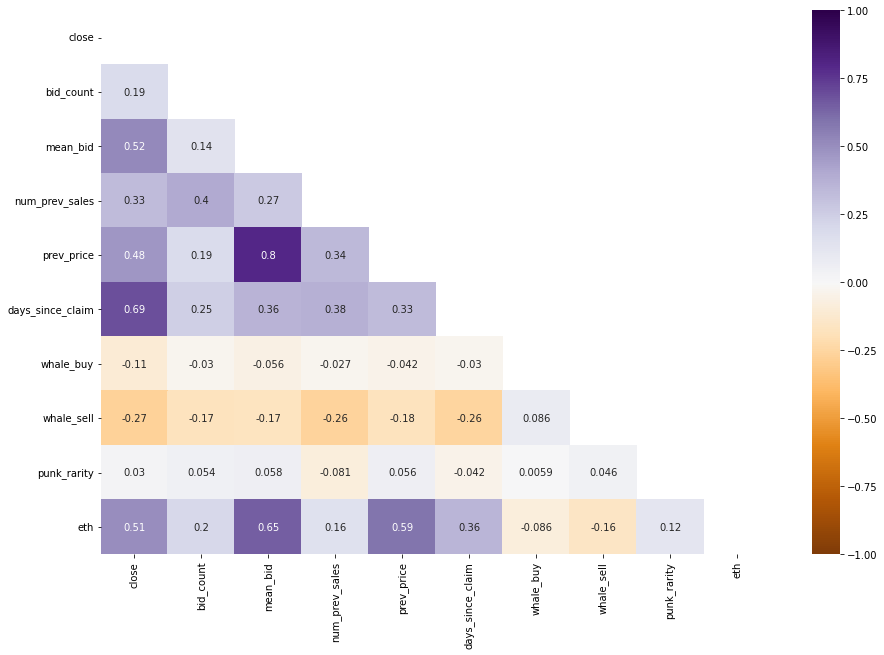

In [17]:
#plotting a heatmap of correlation 

corr_df = cp_sales_num.corr()

plt.figure(figsize=(15,10))
mask=np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, mask=mask, vmax=1, vmin=-1, center=0, cmap='PuOr', annot=True)

plt.savefig('/content/drive/MyDrive/Brainstation/Capstone/corr.jpeg')

plt.show()

<hr>

Mean bid and previous price demonstrated high correlation which is quite interesting. The previous price the punk sold for clearly informed what the mean bid would be for the next sale. 

Closing price of ETH and days since claim also showed rather high correlation. This could be because the closing price showed a clear exponential trend over time, and the days since claim represents the passage of time as well. 

Mean bid and previous price showed the highest correlation to sale price. Mean bid having a higher correlation that previous price would be due to the dynamic of the correlation between the two, with previous price having an effect on the mean bid, which would in turn have an effect on the final sale price. 
<hr>

In [18]:
#defining features to pass through the regression
y = cp_sales_num['eth']
x = cp_sales_num.drop(['eth'], axis=1)

In [19]:
#importing necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#setting up the grid search 
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(Ridge(), param_grid=params)

#fitting the grid search
sk_reg = grid_search.fit(x, y)

In [20]:
#printing the results from the grid search
sk_reg.best_estimator_

Ridge(alpha=0.1, solver='sparse_cg')

In [21]:
#scoring the results of the grid search 
sk_reg.score(x, y)

0.475904412411404

<hr>

The linear regression fit the numeric traits much better than the attributes, which was expected as the attribute data were all dummied data which doesn't lend itself well to being represented linearly. 
<hr>

In [22]:
#fitting the best model from the grid search
best_2 = Ridge(alpha=0.0001, random_state=789)

best_2.fit(x, y)

Ridge(alpha=0.0001, random_state=789)

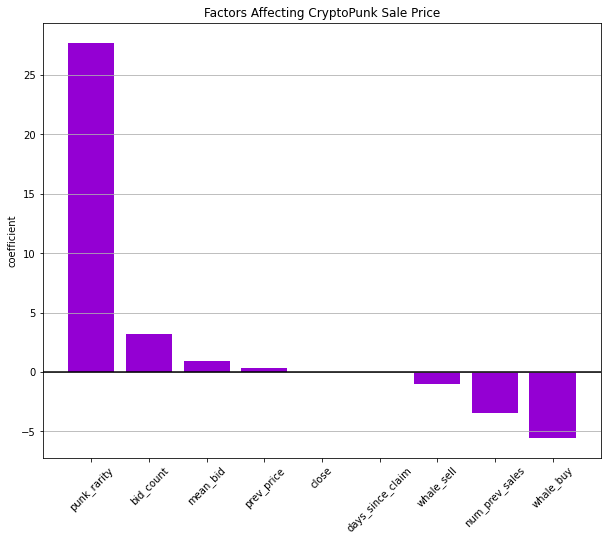

In [23]:
#plotting the coefficients

#defining a dataframe of coefficients
num_coef_df = pd.DataFrame({"coefficient": best_2.coef_, "factor": x.columns})

#sorting the dataframe for descending coefficients
num_coef_df = num_coef_df.sort_values("coefficient", ascending=False)

#making the bar chart
plt.figure(figsize=(10,8))
plt.bar(num_coef_df['factor'], num_coef_df['coefficient'], color='darkviolet')
plt.ylabel('coefficient')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Factors Affecting CryptoPunk Sale Price')
plt.grid(axis='y')
plt.show()

<hr>

Punk rarity far and away impacted the price of the punk most positively while those bought by whales and the number of previous sales of the punk were associated with lower prices. This could be due to whale buyers simply wanted to collect as many punks as possible and thus bought ones at lower prices. The number of previous sales could be due to the fact that those priced lower are bought and sold with less weight. Imagine buying something for 400 ETH, it would be much more difficult to find a buyer for a price higher than that. 

Surprisingly, having a higher mean bid and previous price did not have a very great effect on the future price of the punk given these variables higher correlation to sale price. 
<hr>

# Conclusions

In this notebook I performed several exploratory data analyses to better understand the dynamics of the data ahead of modeling. I got the following interesting insights: 
* There was a lift in price of punks starting around August 2021 that was sustained through October 2021. 
* There was a lag in punk sales between April and July of 2021, only punks with lower rarity were sold during this period. 
* Punks of lower rarity experienced a break out in price around September of 2021, selling for more than other rarer punks. 
* Some punks experienced a loss in value in the later part of 2021, possibly having to do with higher trading volume and thus a saturation of the market. 
* Zombies were associated with the highest price followed by the punk having a hoodie and being an ape. 
* Being male and female by far have the largest effect of a punk having a lower price. 
* While mean bid and previous price showed highest correlation with sale price, they did not have the greatest effect. Though rarity showed a lower correlation to price, it had the greatest effect size. 

In my initial analysis here I saw that normal linear regression models did not perform very well on this data. In the next notebook(03-CryptoPunk Price Prediction Model Constriction) I built non-linear machine learning models to better fit the data for more accurate predictions. 
<hr>

# Data Dictionary

* `txn_type`: In the final dataset, this feature is all "Sold." This was kept to ensure that only data on sales was being used in the analysis. This feature was always removed when building and running models. 
* `date`: The date of the sale. This feature was used during EDA but was removed for model building and running. 
* `source`: This specifies the source of the transaction data. This data was compiled from sales through Larva Labs, the creators of CryptoPunks, and Opensea, one of the largest NFT trading platforms. 
* `eth`: The price the CryptoPunk sold for in Ether, the native cryptocurrency to the Ethereum blockchain. 
* `punk_id`: The unique ID of a CryptoPunk denotes the order it was minted in.
* `close`: The closing price of ETH in USD for the date of the sale. 
* `bid_count`: The number of bids made on the punk prior to the final sale.
* `mean_bid`: The average of the bids for the sale in ETH.
* `num_prev_sales`: The number of sales of the punk prior to that sale.
* `prev_price`: The price the punk sold for in ETH at the sale immediately prior. 
* `days_since_claim`: The number of days from the date CryptoPunks were first claimed (June 23, 2017) until the day of the sale.
* `whale_buy`: 1 if the buyer had made 100 or more purchases, 0 if the buyer had made fewer than 100 purchases.
* `whale_sell`: 1 if the seller had sold 100 or more times, 0 if the seller had sold for fewer than 100 times. 
* Traits vectors: Columns representing the unique traits found in CryptoPunks. 1 if the punk being sold has that trait, else 0.
* Types vectors: Columns representing the unique types of punks. 1 if the punk is that type, else 0.
* `punk_rarity`: A dervived variable to represent how common the traits and type of the punk is from 0-1, with a higher value denoting greater rarity. 
* Source vectors: `larvalabs` and `opensea` columns with 1 denoting the data on the sale came from that platform, else 0. 